# Regression Model for Video Games Sales 🎮

## Objective
This notebook demonstrates the process of training, evaluating, and visualising a regression model for the sales of Video Games.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

### Load Data
The following section prepares the dataset for analysis, including loading the data and displaying the first few rows.


In [2]:
df = pd.read_csv('VideoGameSales.csv')

In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Preprocessing

### Dropping the 'Rank' Column 

In [4]:
df.drop('Rank', axis = 1 , inplace= True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [6]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
def nulls_summary_table(df):
    """
    Returns a summary table showing null value counts and percentage
    
    Parameters:
    df (DataFrame): Dataframe to check
    
    Returns:
    null_values (DataFrame)
    """
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0]/len(df) * 100
    null_values.columns = ['Null_count','Null_percentage']
    return null_values

nulls_summary_table(df)

,Null_count,Null_percentage
Name,0,0.000000
Platform,0,0.000000
Year,271,1.632727
Genre,0,0.000000
Publisher,58,0.349440
NA_Sales,0,0.000000
EU_Sales,0,0.000000
JP_Sales,0,0.000000
Other_Sales,0,0.000000
Global_Sales,0,0.000000


So, Now we have a problem in our dataset which is null values. 

> with `year` column we find that a 1.6 percent of the data is missing 

> and with `Publisher` column there is 0.5 percent of the data is missing 

what shoud we do?

## Filling NULLS

### Impute Year by Platform median

In [9]:
df['Year'] = df.groupby('Platform')['Year'].apply(lambda x: x.fillna(x.median()))

In [10]:
df['Year'] = df['Year'].astype(int)

In [11]:
df.isnull().sum()

Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

The problem of year has been solved, Let's go to the Publisher column

In [12]:
df['Publisher_Mode'] = df.groupby('Genre')['Publisher'].transform(lambda x: x.mode().iloc[0])

print(df[['Genre', 'Publisher_Mode']].head(10))

          Genre      Publisher_Mode
0        Sports     Electronic Arts
1      Platform            Nintendo
2        Racing     Electronic Arts
3        Sports     Electronic Arts
4  Role-Playing  Namco Bandai Games
5        Puzzle            Nintendo
6      Platform            Nintendo
7          Misc             Ubisoft
8      Platform            Nintendo
9       Shooter          Activision


- showing a case of what should be fill if we impute Publisher by Genre mode

In [13]:
df.drop('Publisher_Mode',axis=1 , inplace = True)

In [14]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Impute Publisher by Genre mode

In [15]:
df['Publisher'] = df.groupby('Genre')['Publisher'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [16]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

**All null values have been effectively handled.**

In [17]:
df.describe(include='object')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16598
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1355


- Now lets deal with the **Categorical Columns** 

> `Name` column will not used in the model phase because it will not **affect** the accury and can make a misleading.

> `Publisher` column will aslo not used because it has **578** unique rows which also can make misleading to the model.

> `Platform` , `Genre` column will be used and don't have many uniqueness.

Let's encode both of them using *LabelEncoder*

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [19]:
feature = ["Platform", "Genre"]

for col in feature:
    df[col] = label_encoder.fit_transform(df[col])

In [20]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,26,2006,10,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,11,1985,4,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,26,2008,6,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,26,2009,10,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,5,1996,7,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,6,2002,4,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,7,2003,8,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,16,2008,6,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,4,2010,5,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Before we split columns for training model we must see the correlation

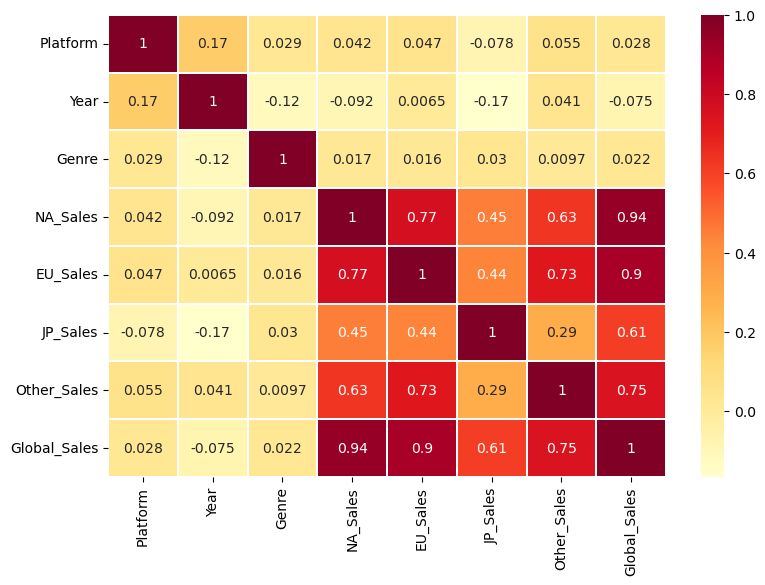

In [21]:
corr_ = df.corr()

plt.figure(figsize=(9, 6))

sns.heatmap(corr_, annot=True, linewidths=.2, cmap='YlOrRd') 

plt.show()



We can see here that the columns affecting the target column `Global_Sales` are:

> `NA_Sales`	`EU_Sales`	`JP_Sales`	`Other_Sales`, with correlations reaching **0.94 , 0.9 , 0.61 , and 0.75**, respectively.

> `Platform` and `Genre` have little to no effect on the target variable, which is expected because these are categorical columns, and it is not clear how much they affect the target.

> `Year` column is considered an object and will not be used in the model.

# Modeling ( Linear Regression)

### A) Data Extraction( Splitting )

In [22]:
X = df[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

y = df['Global_Sales'].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.25,random_state=42)

### B) Model Building & Training

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [25]:
reg.score(X,y)

0.9999887213192009

In [26]:
y_pred = reg.predict(X_test)

### C) Model Evaluation

In [27]:
from sklearn.metrics import r2_score
print(f"Regression R² Score:{r2_score(y_test, y_pred)}")

Regression R² Score:0.9999923531202153


It seems we have an overfitting problem.

- To address this, we will **regularize** the model using Ridge or Lasso regression, both of which incorporate the parameter `α` in the **cost function**.

In [28]:
from sklearn.linear_model import Ridge

#Apply Ridge Regression
ridge_model = Ridge(alpha = 950)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)


ridge_r2 = r2_score(y_test ,ridge_pred)
print(f"Ridge Regression R² Score: {ridge_r2}")

Ridge Regression R² Score: 0.9852176502293425


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, ridge_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, ridge_pred)
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 0.07946472799538518
Mean Squared Error: 0.05229590216952921


### Predict new values for unseen data

In [30]:
new_data = {
    'Platform': ['PS4'],   # platform is 'PS4'
    'Genre': ['Action'],   # genre is 'Action'
    'NA_Sales': [3.5],     # North America sales value
    'EU_Sales': [2.0],     # Europe sales value
    'JP_Sales': [0.5],     # Japan sales value
    'Other_Sales': [0.2]   # Other regions sales value
}

new_data_df = pd.DataFrame(new_data)

# Encode categorical columns 
label_encoder = LabelEncoder()
for col in ['Platform', 'Genre']:
    new_data_df[col] = label_encoder.fit_transform(new_data_df[col])

    
new_X = new_data_df[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

# Predict the new value (Global_Sales)
predicted_sales = ridge_model.predict(new_X)

print(f"Predicted Global Sales for new input: {predicted_sales[0]}")

Predicted Global Sales for new input: 5.935756127201179


# Visualize the Actual vs. Predicted Values

In [33]:
from IPython.display import display
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': ridge_pred})
display(comparison_df)

,Actual,Predicted
0,0.15,0.179852
1,0.40,0.452800
2,0.02,0.084943
3,0.03,0.084886
4,0.36,0.385915
...,...,...
4145,0.02,0.073086
4146,0.47,0.499546
4147,0.08,0.130977
4148,0.35,0.325333


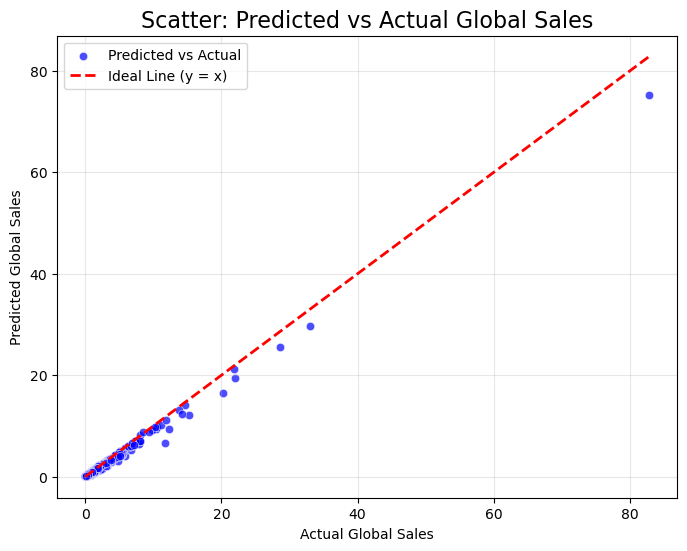

In [31]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=ridge_pred, color='blue', alpha=0.7, label='Predicted vs Actual')

# Adding the ideal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line (y = x)')

plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Scatter: Predicted vs Actual Global Sales', fontsize=16)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


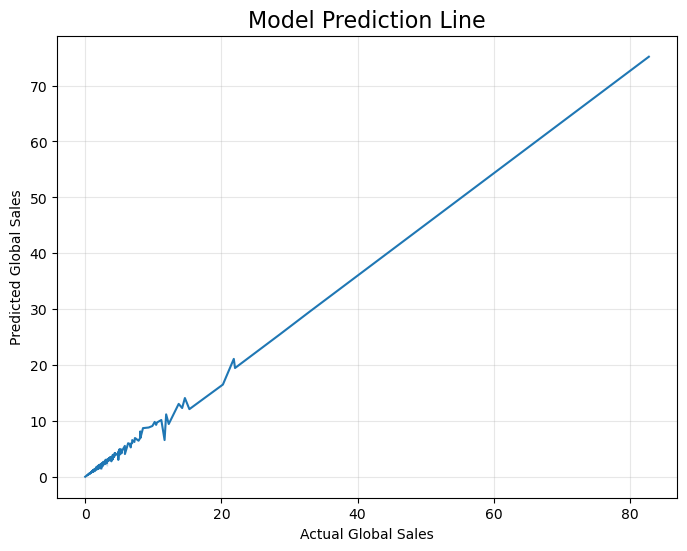

In [32]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=y_test, y=ridge_pred)

plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Model Prediction Line', fontsize=16)
plt.grid(alpha=0.3)
plt.show()

# Thank You! 🎉✨

Thank you for your time and attention! 🙏😊  


---


